<a href="https://colab.research.google.com/github/anirudhssundar/optimal_control/blob/main/6553_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [141]:
import numpy as np
import matplotlib.pyplot as plt

In [142]:
def get_p(x1,x2,r,dt):
  # p = [x[-1]]

  if type(r)!=int:
    p1 = [0]
    p2 = [0]
    x1_rev = x1[::-1]
    x2_rev = x2[::-1]
    r_rev = r[::-1]
    for i in range(1,len(x1)):
      # p_t_minus_dt = p[-1]*(1-dt) + 2*x_rev[i]*dt
      p2_t_minus_dt = p2[-1] - dt*(p2[-1]/(2*np.sqrt(x2_rev[i])) - 4*(x2_rev[i]-r_rev[i]))
      p2.append(p2_t_minus_dt)

      p1_t_minus_dt = p1[-1] - dt*(p1[-1]/(2*np.sqrt(x1_rev[i])) - p2[-1]/(2*np.sqrt(x1_rev[i])))
      p1.append(p1_t_minus_dt)
    return np.array(p1[::-1]), np.array(p2[::-1])
  
  else:
    p1 = [0]
    p2 = [0]
    x1_rev = x1[::-1]
    x2_rev = x2[::-1]
    for i in range(1,len(x1)):
      # p_t_minus_dt = p[-1]*(1-dt) + 2*x_rev[i]*dt
      p2_t_minus_dt = p2[-1] - dt*(p2[-1]/(2*np.sqrt(x2_rev[i])) - 4*(x2_rev[i]-r))
      p2.append(p2_t_minus_dt)

      p1_t_minus_dt = p1[-1] - dt*(p1[-1]/(2*np.sqrt(x1_rev[i])) - p2[-1]/(2*np.sqrt(x1_rev[i])))
      p1.append(p1_t_minus_dt)
    return np.array(p1[::-1]), np.array(p2[::-1])

In [173]:
def get_u(t1,t2,t3,dt):
  t = np.arange(1000)
  dynu = []
  for i,foo in enumerate(t):
    if foo*dt < t1:
      dynu.append(2)
    elif (foo*dt>=t1) and (foo*dt<t2):
      dynu.append(1)
    elif (foo*dt>=t2) and(foo*dt<t3):
      dynu.append(2)
    else:
      dynu.append(1)
  return dynu

In [186]:
def get_single_u(t1,dt):
  t = np.arange(1000)
  dynu = []
  for i,foo in enumerate(t):
    if foo*dt < t1:
      dynu.append(2)
    else:
      dynu.append(1)
  return np.array(dynu)

In [144]:
def J(x,r,dt):
  val = 2*np.sum((x - r)**2)*dt
  return val

In [145]:
def J_vec(x,r,dt):
  val = 2*np.sum((x))

In [146]:
def dyn_u(t1,t2,dt):
  dynu = get_u(t1,t2,dt)
  dynx = get_trajectory(dynu,1.5,dt)
  cost = J(dynx,2.5,dt)
  return cost

In [147]:
def get_trajectory_x1(u,x1_0,dt):
  x = x1_0
  x_fin = []
  x_fin.append(x1_0)
  for i in u:
    x_dot = -np.sqrt(x) + i
    x_new = x_dot*dt + x
    x_fin.append(x_new)
    x = x_new 
  return np.array(x_fin[:-1])

In [148]:
def get_trajectory_x2(x1,x2_0,dt):
  x = x2_0
  x_fin = []
  x_fin.append(x2_0)
  for i in x1:
    x_dot = -np.sqrt(x) + i
    x_new = x_dot*dt + x
    x_fin.append(x_new)
    x = x_new 
  return np.array(x_fin[:-1])

In [149]:
def minimize_hamiltonian(p1,p2,x1,x2,dt):
  conv_u = np.arange(1,2,0.01)
  # minimize p1f1 + p2f2 +L -> same as minimizing p1f1 since u doesnt appear in f2
  v_i = []
  for i in range(len(p1)):
    min_index = np.argmin(p1[i]*(conv_u-np.sqrt(x1[i])))
    v_i.append(conv_u[min_index])
  return np.array(v_i)

hi 4.507480037467594
hi 2.537400187337968
hi 1.5523602622731554


'\nif abs(p1[int(t_1*dt)])<tol:\n  print("done")\nelse:\n  while abs(p1[int(t_1*dt)])>tol:\n    if iters==8:\n      break\n    k=0\n    while dyn_u(t_1 - (beta**k)*p[int(t_1*dt)],t_2,dt) > dyn_u(t_1,t_2,dt) -alpha*(beta**k)*(p[int(t_1*dt)]**2):\n      k+=1\n      # print(k)\n      # print(dyn_u(t_1 - (beta**k)*p[int(t_1*dt)],dt))\n\n      if k==20:\n        break\n    lambd = -(beta**k)/(beta**2)\n    # beta = beta*2\n    t_1 = t_1 + lambd*p[int(t_1*dt)]\n    plt.scatter(iters, dyn_u(t_1,t_2,dt))\n    print("t changed",t_1)\n\n    u_new = get_u(t_1,t_2,dt)\n    x_new = get_trajectory(u_new, x_0,dt)\n    p = get_p(x_new,dt)\n    iters+=1\n\n\nalpha=0.2\nbeta=0.5\niters=0\nif abs(p[int(t_2*dt)])<tol:\n  print("done")\nelse:\n  while abs(p[int(t_2*dt)])>tol:\n    if iters==8:\n      break\n    k=0\n    while dyn_u(t_1,t_2 - (beta**k)*p[int(t_2*dt)],dt) > dyn_u(t_1,t_2,dt) -alpha*(beta**k)*(p[int(t_2*dt)]**2):\n      k+=1\n      # print(k)\n      # print(dyn_u(t_1 - (beta**k)*p[int(t_1*dt)

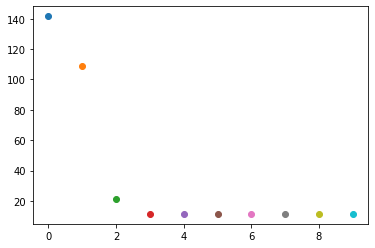

In [257]:
# Part a -> Single switching
x1_0 = 2
x2_0 = 2
dt = 0.01
t = np.arange(1000)
r = 3

u = np.ones(1000)
x1 = get_trajectory_x1(u, x1_0,dt)
x2 = get_trajectory_x2(x1, x2_0, dt)


alpha=0.0002
beta=0.5
tol = 1e-4

t_1 = 5
# t_2 = np.arange()
# t_3 = 9

u = np.array(500*[2]+500*[1])
x1 = get_trajectory_x1(u, x1_0,dt)
x2 = get_trajectory_x2(x1, x2_0, dt)
p1,p2 = get_p(x1,x2,r,dt)

# ARMIJO STUFF

# Single Switch
for iters in range(10):
  
  x1 = get_trajectory_x1(u, x1_0,dt)
  x2 = get_trajectory_x2(x1, x2_0, dt)
  
  plt.scatter(iters,J(x2,r,dt))

  for l in range(20):
    t_new = t_1 - (beta**l)*p1[int(t_1*dt)]
    if t_new < 0:
      t_new = t_1
    u_new = get_single_u(t_new,dt)
    x1_temp = get_trajectory_x1(u_new, x1_0,dt)
    x2_temp = get_trajectory_x2(x1_temp, x2_0, dt)
    if J(x2_temp,r,dt) - J(x2,r,dt) < -alpha*(beta**l)*(p1[int(t_1*dt)]**2):
      t_1 = t_new
      print("hi",t_1)
      u = u_new
      # print(l)
      break
    beta = beta/2
# plt.plot(u)

In [258]:
# u = np.array(500*[2]+500*[1])
x1 = get_trajectory_x1(u, x1_0,dt)
x2 = get_trajectory_x2(x1, x2_0, dt)
p1,p2 = get_p(x1,x2,r,dt)

11.482860255386065


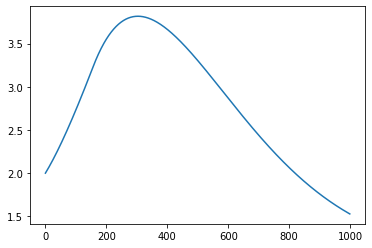

In [259]:
plt.plot(x2)
print(J(x2,r,dt))
# t_new

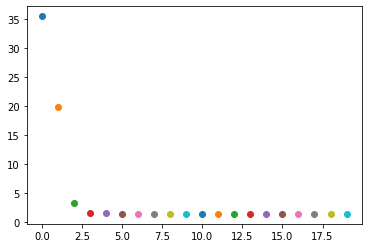

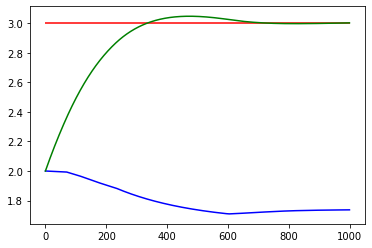

In [125]:
# Project 1b
x1_0 = 2
x2_0 = 2
dt = 0.01
t = np.arange(1000)
r = 3

u = np.ones(1000)
x1 = get_trajectory_x1(u, x1_0,dt)
x2 = get_trajectory_x2(x1, x2_0, dt)
# plt.plot(x1)
# plt.plot(x2)
# p1 = get_p(x1,dt)
# p2 = get_p(x2,dt)
# plt.plot(p1)
# plt.plot(p2)
p1,p2 = get_p(x1,x2,r,dt)
alpha = 1e-4
beta = 0.5
tol = 1e-4

for j in range(20):
  x1 = get_trajectory_x1(u,x1_0,dt)
  x2 = get_trajectory_x2(x1,x2_0,dt)

  plt.scatter(j,J(x2,r,dt))

  p1,p2 = get_p(x1,x2,r,dt)
  v_i = minimize_hamiltonian(p1,p2,x1,x2,dt)

  theta_u = dt*np.sum(np.dot(p1, v_i - u))

  for l in range(10):

    convex_combination = (1 - beta**l)*u + (beta**l)*v_i

    x1_temp = get_trajectory_x1(convex_combination,x1_0,dt)
    x2_temp = get_trajectory_x2(x1_temp,x2_0,dt)
    if J(x2_temp,r,dt) - J(x2,r,dt) < alpha*(beta**l)*theta_u:
      # print(l)
      u = convex_combination
      # plt.plot(u)
      beta = beta/2
      break
x1_fin = get_trajectory_x1(u, x1_0,dt)
x2_fin = get_trajectory_x2(x1_fin, x2_0,dt)
plt.figure()
plt.plot(t,x1_fin,color='b')
plt.plot(t,x2_fin,color='g')
plt.hlines(y=3.0,xmin=0,xmax=1000,colors='r')

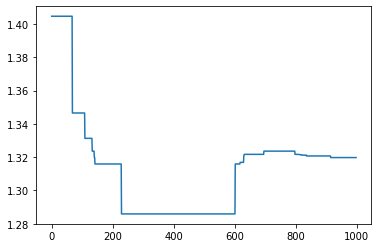

In [117]:
plt.plot(u[:-1])

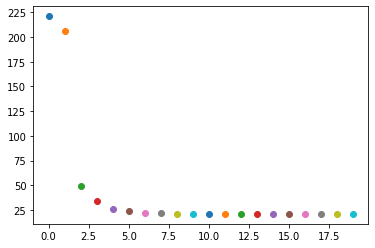

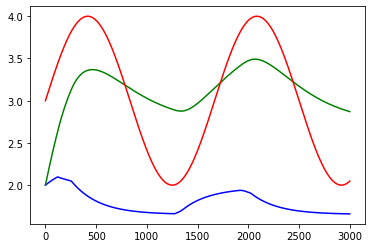

In [137]:
# Problem 1c
x1_0 = 2
x2_0 = 2
dt = 0.01
t = np.arange(3000)
r = 3 + np.sin(0.12*np.pi*t*dt)

u = np.ones(3000)
x1 = get_trajectory_x1(u, x1_0,dt)
x2 = get_trajectory_x2(x1, x2_0, dt)
# plt.plot(x1)
# plt.plot(x2)
# p1 = get_p(x1,dt)
# p2 = get_p(x2,dt)
# plt.plot(p1)
# plt.plot(p2)
p1,p2 = get_p(x1,x2,r,dt)
alpha = 1e-4
beta = 0.5
tol = 1e-4

for j in range(20):
  x1 = get_trajectory_x1(u,x1_0,dt)
  x2 = get_trajectory_x2(x1,x2_0,dt)

  plt.scatter(j,J(x2,r,dt))

  p1,p2 = get_p(x1,x2,r,dt)
  v_i = minimize_hamiltonian(p1,p2,x1,x2,dt)

  theta_u = dt*np.sum(np.dot(p1, v_i - u))

  for l in range(10):

    convex_combination = (1 - beta**l)*u + (beta**l)*v_i

    x1_temp = get_trajectory_x1(convex_combination,x1_0,dt)
    x2_temp = get_trajectory_x2(x1_temp,x2_0,dt)
    if J(x2_temp,r,dt) - J(x2,r,dt) < alpha*(beta**l)*theta_u:
      # print(l)
      u = convex_combination
      # plt.plot(u)
      beta = beta/2
      break
x1_fin = get_trajectory_x1(u, x1_0,dt)
x2_fin = get_trajectory_x2(x1_fin, x2_0,dt)
plt.figure()
plt.plot(t,x1_fin,color='b')
plt.plot(t,x2_fin,color='g')
# plt.hlines(y=3.0,xmin=0,xmax=1000,colors='r')
plt.plot(t,r,color='r')

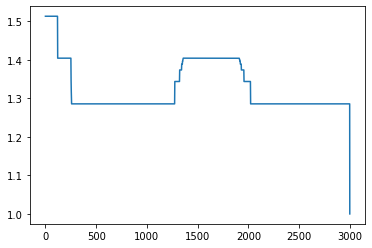

In [138]:
plt.plot(u)

In [ ]:
x_fin = get_trajectory(u,x_0,dt)

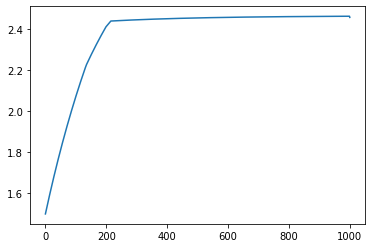

In [ ]:
plt.plot(x_fin)

In [ ]:
beta**l

0.001953125

In [ ]:
J(get_trajectory((1 - beta**l)*u + (beta**l)*u_new,x_0,dt),r,dt) - J(x,r,dt)

0.011193922073761797

In [ ]:
min_set = np.arange(1,2,0.01)
i=0
np.argmin(p[i]*min_set + np.sqrt(x[i]))


99

In [ ]:
p1

array([array([-12.30554748, -16.20931234, -19.56480502, ...,  -2.71033841,
               -5.04628995,  -8.40178263])                                ,
       array([-12.31195319, -16.21468434, -19.56928851, ...,  -2.71928488,
               -5.05461786,  -8.40922203])                                ,
       array([-12.31839856, -16.22009089, -19.57380213, ...,  -2.72828362,
               -5.06299499,  -8.41670622])                                ,
       ...,
       array([-0.00119599, -0.00141613, -0.00160535, ..., -0.00065491,
              -0.00078663, -0.00097585])                              ,
       array([-0.0004    , -0.00047362, -0.00053691, ..., -0.00021903,
              -0.00026309, -0.00032637])                              , 0],
      dtype=object)

In [123]:
a=1
type(a)

int

In [135]:
np.sin(0.12*np.pi*30)

-0.9510565162951538

In [169]:
x1_0 = 2
x2_0 = 2
dt = 0.01
t = np.arange(1000)
r = 3

u = np.ones(1000)
x1 = get_trajectory_x1(u, x1_0,dt)
x2 = get_trajectory_x2(x1, x2_0, dt)

costs = []

for t_1 in np.arange(0,9,0.1):
  for t_2 in range(t_1+0.1,10):
    for t_3 in range(t_2+1,11):
      u = get_u(t_1,t_2,t_3,dt)
      x1 = get_trajectory_x1(u, x1_0,dt)
      x2 = get_trajectory_x2(x1, x2_0, dt)
      cost = J(x2,r,dt)
      costs.append([t_1,t_2,t_3, cost])

In [170]:
costs_sorted = sorted(costs,key=lambda x:x[3])

In [171]:
costs_sorted[0]

[2, 4, 8, 4.865739645506476]

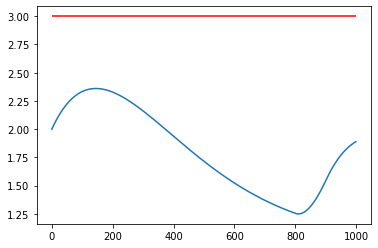

In [172]:
plt.plot(x2)
plt.hlines(3,0,1000,'r')

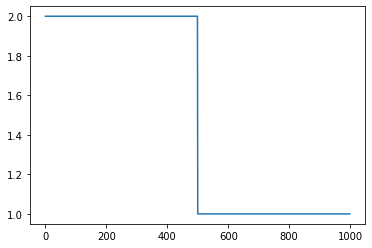

In [197]:
plt.plot(get_single_u(5,dt))

[1.61, 11.45488438473011]


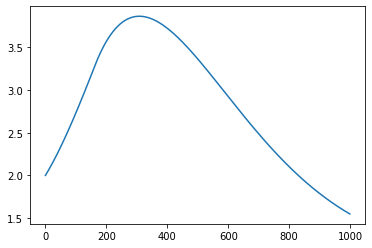

In [233]:
costs = []
for t_1 in np.arange(0,10,0.01):
  u = get_single_u(t_1,dt)
  x1 = get_trajectory_x1(u,x1_0,dt)
  x2 = get_trajectory_x2(x1,x2_0,dt)
  cost = J(x2,r,dt)
  costs.append([t_1,cost])
print(sorted(costs, key=lambda x:x[1])[0])
t_min = sorted(costs, key=lambda x:x[1])[0][0]
u = get_single_u(t_min,dt)
x1 = get_trajectory_x1(u,x1_0,dt)
x2 = get_trajectory_x2(x1,x2_0,dt)
plt.plot(x2)

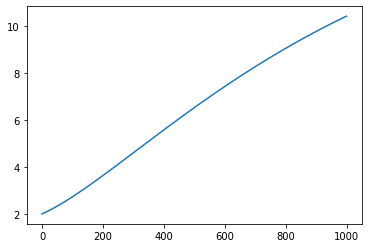

In [229]:
plt.plot(x2)

[[0.0, 35.51758855027392],
 [0.1, 32.89754745802376],
 [0.2, 30.38768756272799],
 [0.30000000000000004, 27.76507570900027],
 [0.4, 25.73504544286945],
 [0.5, 23.60984021322214],
 [0.6000000000000001, 21.440284529774495],
 [0.7000000000000001, 19.803506032904668],
 [0.8, 18.13826109136968],
 [0.9, 16.641735563638836],
 [1.0, 15.321136252440857],
 [1.1, 14.183364947449693],
 [1.2000000000000002, 13.150837800597529],
 [1.3, 12.482343397295182],
 [1.4000000000000001, 11.931301127700909],
 [1.5, 11.587483892506553],
 [1.6, 11.456141175965392],
 [1.7000000000000002, 11.56289497090821],
 [1.8, 11.85005766494948],
 [1.9000000000000001, 12.38395970757526],
 [2.0, 13.147596354101402],
 [2.1, 14.14428438868963],
 [2.2, 15.376914458961275],
 [2.3000000000000003, 16.847937299519664],
 [2.4000000000000004, 18.743775660373],
 [2.5, 20.51268204806737],
 [2.6, 22.708982457379612],
 [2.7, 25.148806134440264],
 [2.8000000000000003, 27.832201582652132],
 [2.9000000000000004, 31.06468537775747],
 [3.0, 33.